In [23]:
import pandas as pd
# import polars as pl
from datetime import datetime

# Define the input format and output format
input_format = '%Y-%m-%dT%H:%M'
output_format = '%Y-%m-%d %H:%M'

# Read CSV file, skip first 3 rows
df_weather = pd.read_csv('archive.csv', skiprows=3)

# Convert date format
df_weather['time'] = df_weather['time'].apply(lambda x: datetime.strptime(x, input_format).strftime(output_format))

# Print the first few rows of the DataFrame
df_weather.head()


,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
0,2015-01-01 00:00,4.0,97,0.0,0.0,0.0,3.75,7.13
1,2015-01-01 01:00,4.0,96,0.0,0.0,0.0,3.95,7.64
2,2015-01-01 02:00,3.8,96,0.0,0.0,0.0,4.01,7.92
3,2015-01-01 03:00,3.6,95,0.0,0.0,0.0,4.14,7.91
4,2015-01-01 04:00,3.3,94,0.0,0.0,0.0,4.04,7.83


In [3]:
df_weather = pl.from_pandas(df_weather)

In [4]:
df_weather.head()

time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s)
str,f64,i64,f64,f64,f64,f64,f64
"""2015-01-01 00:…",4.0,97,0.0,0.0,0.0,3.75,7.13
"""2015-01-01 01:…",4.0,96,0.0,0.0,0.0,3.95,7.64
"""2015-01-01 02:…",3.8,96,0.0,0.0,0.0,4.01,7.92
"""2015-01-01 03:…",3.6,95,0.0,0.0,0.0,4.14,7.91
"""2015-01-01 04:…",3.3,94,0.0,0.0,0.0,4.04,7.83


In [26]:
df_prices = pd.read_csv('Elspotprices.csv', sep = ';')
df_prices.head()

,HourUTC,HourDK,PriceArea,SpotPriceDKK,SpotPriceEUR
0,2019-12-30 22:00,2019-12-30 23:00,DK1,"181,729996","24,330000"
1,2019-12-30 21:00,2019-12-30 22:00,DK1,"221,690002","29,680000"
2,2019-12-30 20:00,2019-12-30 21:00,DK1,"221,619995","29,670000"
3,2019-12-30 19:00,2019-12-30 20:00,DK1,"229,160004","30,680000"
4,2019-12-30 18:00,2019-12-30 19:00,DK1,"235,889999","31,580000"


In [31]:
df_prices = df_prices.rename(columns={"HourDK": "time"})
df_prices

,HourUTC,time,PriceArea,SpotPriceDKK,SpotPriceEUR
0,2019-12-30 22:00,2019-12-30 23:00,DK1,"181,729996","24,330000"
1,2019-12-30 21:00,2019-12-30 22:00,DK1,"221,690002","29,680000"
2,2019-12-30 20:00,2019-12-30 21:00,DK1,"221,619995","29,670000"
3,2019-12-30 19:00,2019-12-30 20:00,DK1,"229,160004","30,680000"
4,2019-12-30 18:00,2019-12-30 19:00,DK1,"235,889999","31,580000"
...,...,...,...,...,...
43795,2015-01-01 03:00,2015-01-01 04:00,DK1,"111,269997","14,950000"
43796,2015-01-01 02:00,2015-01-01 03:00,DK1,"108,669998","14,600000"
43797,2015-01-01 01:00,2015-01-01 02:00,DK1,"119,389999","16,040001"
43798,2015-01-01 00:00,2015-01-01 01:00,DK1,"136,130005","18,290001"


In [32]:
# merge the files
df_wp = df_weather.merge(df_prices, on = 'time', how= "inner")

In [33]:
df_wp.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s),HourUTC,PriceArea,SpotPriceDKK,SpotPriceEUR
0,2015-01-01 00:00,4.0,97,0.0,0.0,0.0,3.75,7.13,2014-12-31 23:00,DK1,"186,220001","25,020000"
1,2015-01-01 01:00,4.0,96,0.0,0.0,0.0,3.95,7.64,2015-01-01 00:00,DK1,"136,130005","18,290001"
2,2015-01-01 02:00,3.8,96,0.0,0.0,0.0,4.01,7.92,2015-01-01 01:00,DK1,"119,389999","16,040001"
3,2015-01-01 03:00,3.6,95,0.0,0.0,0.0,4.14,7.91,2015-01-01 02:00,DK1,"108,669998","14,600000"
4,2015-01-01 04:00,3.3,94,0.0,0.0,0.0,4.04,7.83,2015-01-01 03:00,DK1,"111,269997","14,950000"


In [36]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      43800 non-null  object 
 1   temperature_2m (°C)       43800 non-null  float64
 2   relativehumidity_2m (%)   43800 non-null  int64  
 3   precipitation (mm)        43800 non-null  float64
 4   direct_radiation (W/m²)   43800 non-null  float64
 5   diffuse_radiation (W/m²)  43800 non-null  float64
 6   windspeed_10m (m/s)       43800 non-null  float64
 7   windspeed_100m (m/s)      43800 non-null  float64
 8   HourUTC                   43800 non-null  object 
 9   PriceArea                 43800 non-null  object 
 10  SpotPriceDKK              43800 non-null  object 
 11  SpotPriceEUR              43800 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 4.3+ MB


In [40]:
# change the dtype [SpotPriceDKK] to int64

# df_wp['SpotPriceDKK'] = (int(df_wp['SpotPriceDKK']).apply(lambda x:x/1000))
#df_wp['SpotPriceDKK'] = df_wp['SpotPriceDKK'].apply(lambda x:float(x)/1000)
df_wp['SpotPriceDKK'] = df_wp['SpotPriceDKK'].apply(lambda x:float(x.replace(',', '.'))/1000)


In [41]:
df_wp.describe()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s),SpotPriceDKK
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,10.903290,74.129954,0.063694,74.688562,52.321347,3.515374,6.020305,0.241752
std,8.280516,17.516082,0.283403,142.215075,72.194674,1.659794,2.638419,0.107269
min,-12.800000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.398610
25%,4.400000,62.000000,0.000000,0.000000,0.000000,2.250000,4.180000,0.177403
50%,10.300000,78.000000,0.000000,0.000000,5.000000,3.290000,5.830000,0.230310
75%,17.200000,89.000000,0.000000,76.000000,95.000000,4.500000,7.610000,0.304645
max,37.400000,100.000000,14.700000,727.000000,400.000000,12.890000,20.070000,1.072800


In [42]:
df_wp.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),windspeed_10m (m/s),windspeed_100m (m/s),HourUTC,PriceArea,SpotPriceDKK,SpotPriceEUR
0,2015-01-01 00:00,4.0,97,0.0,0.0,0.0,3.75,7.13,2014-12-31 23:00,DK1,0.18622,"25,020000"
1,2015-01-01 01:00,4.0,96,0.0,0.0,0.0,3.95,7.64,2015-01-01 00:00,DK1,0.13613,"18,290001"
2,2015-01-01 02:00,3.8,96,0.0,0.0,0.0,4.01,7.92,2015-01-01 01:00,DK1,0.11939,"16,040001"
3,2015-01-01 03:00,3.6,95,0.0,0.0,0.0,4.14,7.91,2015-01-01 02:00,DK1,0.10867,"14,600000"
4,2015-01-01 04:00,3.3,94,0.0,0.0,0.0,4.04,7.83,2015-01-01 03:00,DK1,0.11127,"14,950000"


array([[<Axes: title={'center': 'temperature_2m (°C)'}>,
        <Axes: title={'center': 'relativehumidity_2m (%)'}>,
        <Axes: title={'center': 'precipitation (mm)'}>],
       [<Axes: title={'center': 'direct_radiation (W/m²)'}>,
        <Axes: title={'center': 'diffuse_radiation (W/m²)'}>,
        <Axes: title={'center': 'windspeed_10m (m/s)'}>],
       [<Axes: title={'center': 'windspeed_100m (m/s)'}>,
        <Axes: title={'center': 'SpotPriceDKK'}>, <Axes: >]], dtype=object)

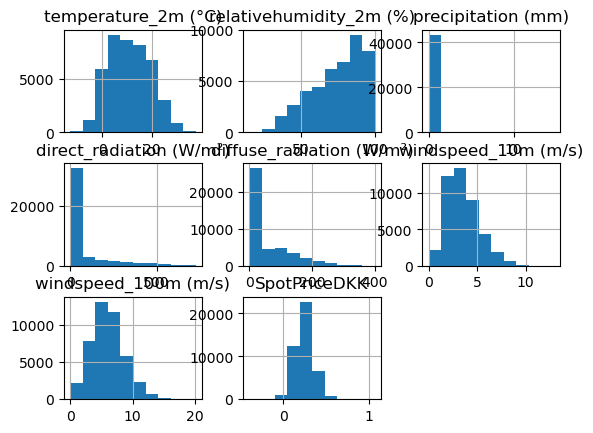

In [44]:
df_wp.hist()

C:\Users\dicod\AppData\Local\Temp\ipykernel_23184\176295835.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_wp.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'temperature_2m (°C)'),
  Text(1.5, 0, 'relativehumidity_2m (%)'),
  Text(2.5, 0, 'precipitation (mm)'),
  Text(3.5, 0, 'direct_radiation (W/m²)'),
  Text(4.5, 0, 'diffuse_radiation (W/m²)'),
  Text(5.5, 0, 'windspeed_10m (m/s)'),
  Text(6.5, 0, 'windspeed_100m (m/s)'),
  Text(7.5, 0, 'SpotPriceDKK')])

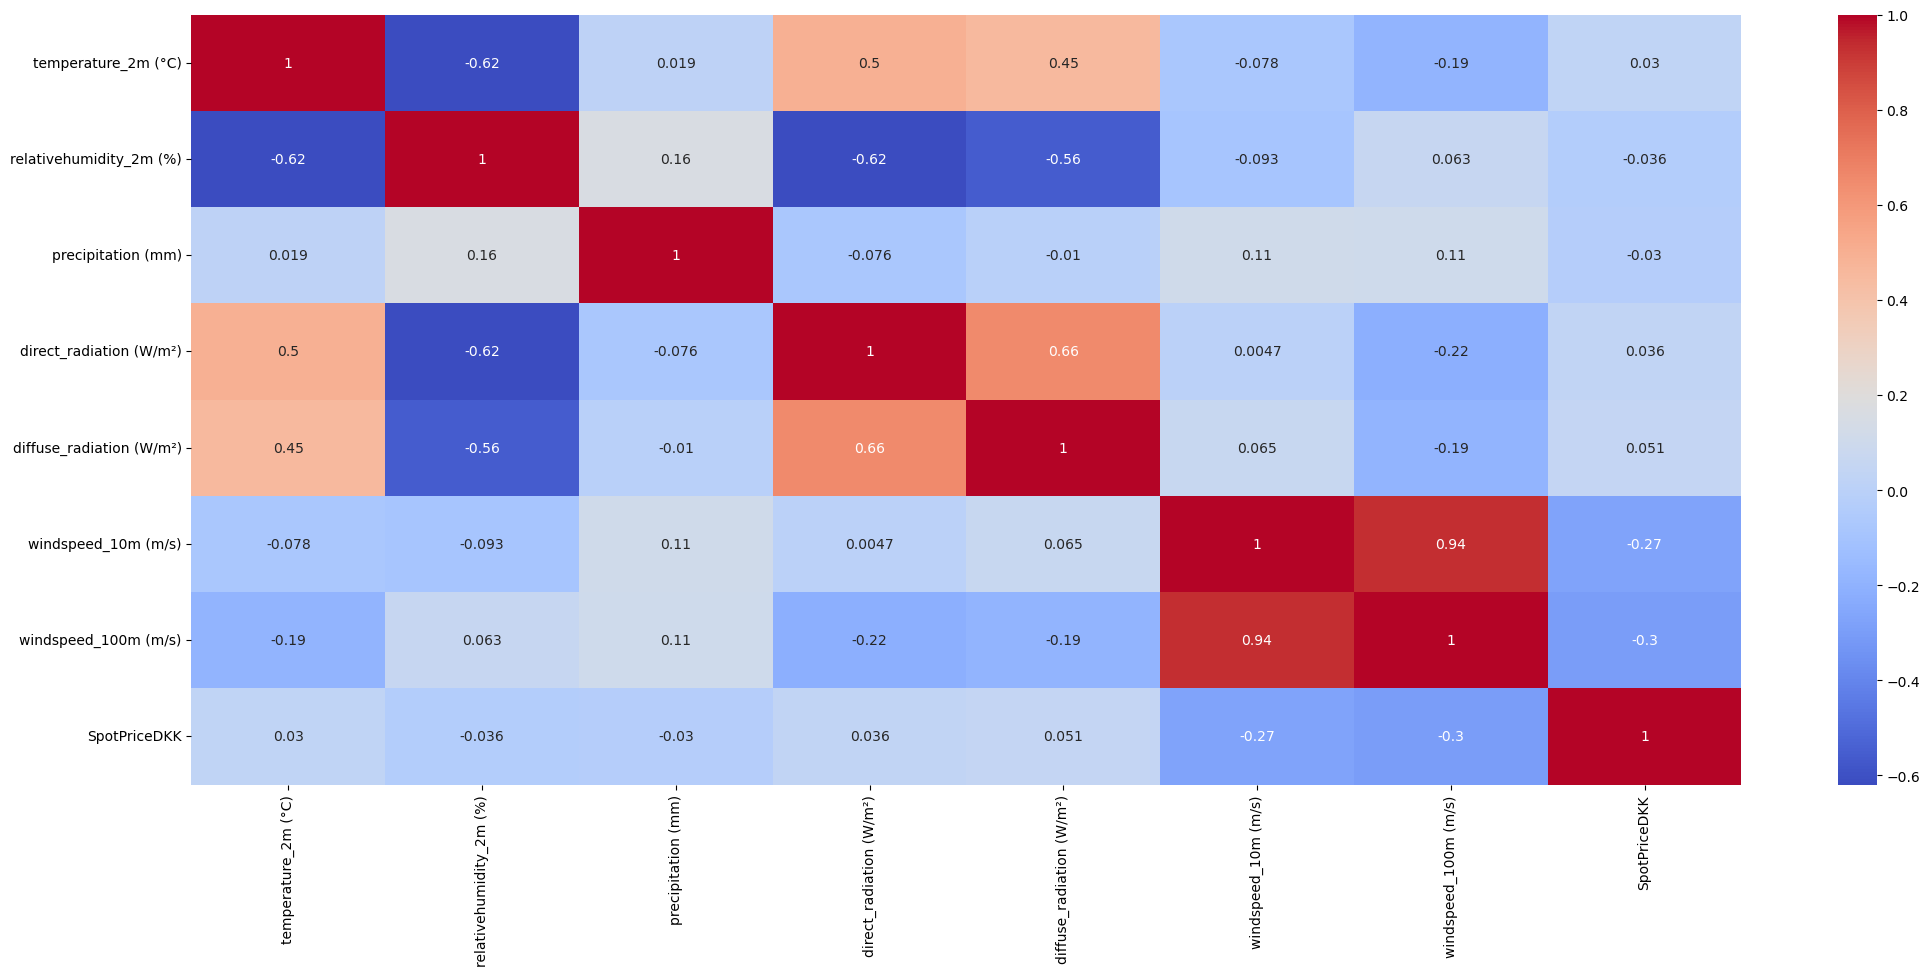

In [46]:
# this result shows the periods

import seaborn as sns # for Interactive plots
import itertools
import matplotlib.pyplot as plt
corr = df_wp.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)